In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "../data/historical_crypto_reddit_merged_historical/engineered_historical_data.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

In [3]:
# Drop non-numerical columns
columns_to_drop = ['Symbol', 'Title', 'Content', 'Sentiment_Label']
numerical_data = data.drop(columns=columns_to_drop, errors='ignore')  # Drop columns, ignore errors if not present

In [4]:
# Ensure only numerical data remains
numerical_data = numerical_data.select_dtypes(include=['float64', 'int64'])

In [5]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

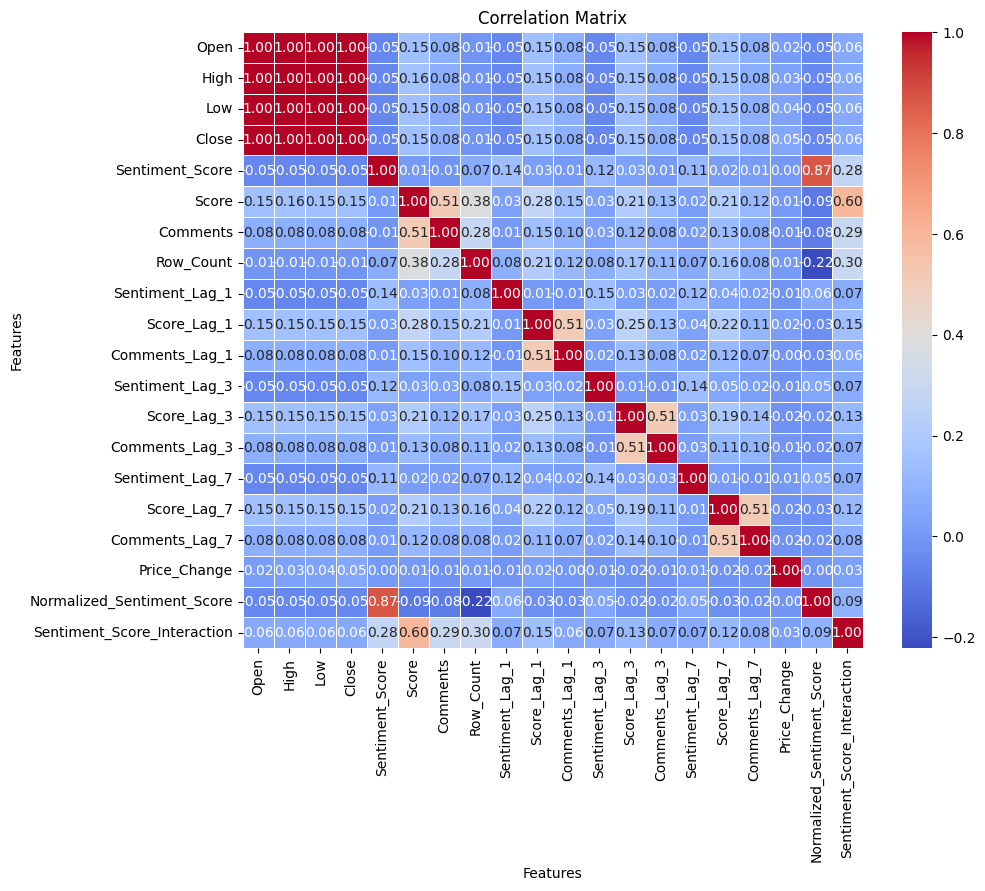

In [6]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

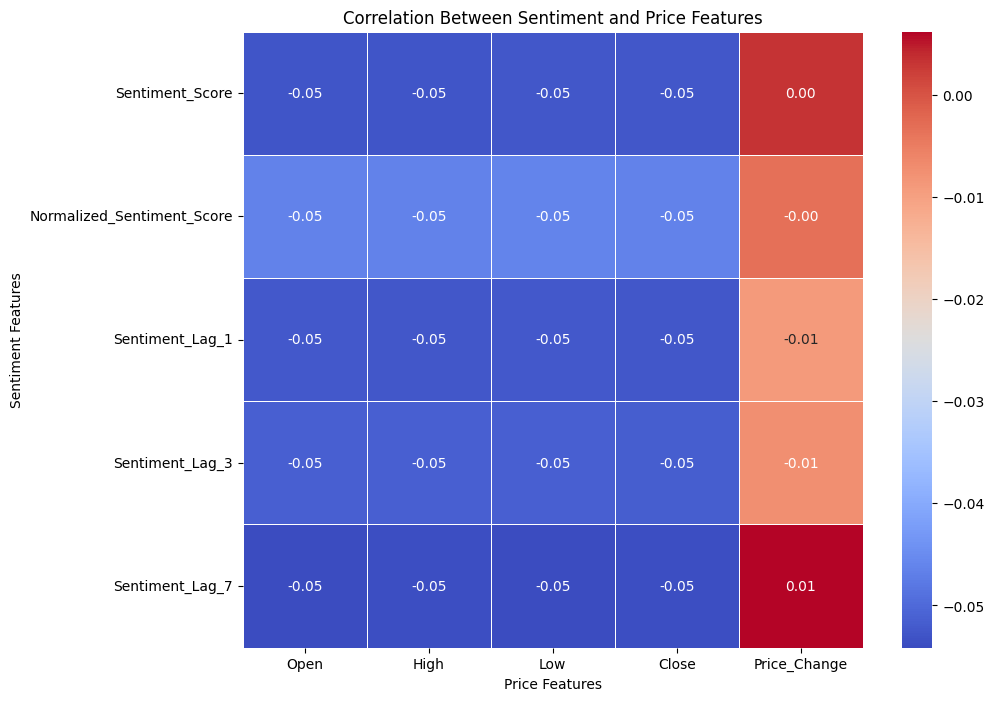

In [7]:
# Filter sentiment-related and price-related features
sentiment_features = [
    'Sentiment_Score', 'Normalized_Sentiment_Score', 'Sentiment_Lag_1',
    'Sentiment_Lag_3', 'Sentiment_Lag_7'
]
price_features = ['Open', 'High', 'Low', 'Close', 'Price_Change']

# Calculate correlations between sentiment and price features
selected_features = sentiment_features + price_features
selected_data = data[selected_features].dropna()

# Correlation matrix for sentiment and price features
correlation_matrix = selected_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix.loc[sentiment_features, price_features],
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5
)
plt.title('Correlation Between Sentiment and Price Features')
plt.xlabel('Price Features')
plt.ylabel('Sentiment Features')
plt.show()
